# Pyber Challenge

### 4.3 Loading and Reading CSV files

In [1]:
# Add Matplotlib inline magic command
%matplotlib inline
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd

# File to Load (Remember to check these)
city_data_to_load = "Resources/city_data.csv"
ride_data_to_load = "Resources/ride_data.csv"

# Read the City and Ride Data
city_data_df = pd.read_csv(city_data_to_load)
ride_data_df = pd.read_csv(ride_data_to_load)

### Merge the DataFrames

In [2]:
# Combine the data into a single dataset
pyber_data_df = pd.merge(ride_data_df, city_data_df, how="left", on=["city", "city"])

# Display the data table for preview
pyber_data_df.head()

,city,date,fare,ride_id,driver_count,type
0,Lake Jonathanshire,2019-01-14 10:14:22,13.83,5739410935873,5,Urban
1,South Michelleport,2019-03-04 18:24:09,30.24,2343912425577,72,Urban
2,Port Samanthamouth,2019-02-24 04:29:00,33.44,2005065760003,57,Urban
3,Rodneyfort,2019-02-10 23:22:03,23.44,5149245426178,34,Urban
4,South Jack,2019-03-06 04:28:35,34.58,3908451377344,46,Urban


## Challenge Deliverable 1. Generate a Ride-Sharing DataFrame by City Type

In [3]:
#  1. Get the total rides for each city type
total_ride_count = pyber_data_df.groupby(["type"]).count()["ride_id"]
total_ride_count.head()

type
Rural        125
Suburban     625
Urban       1625
Name: ride_id, dtype: int64

In [4]:
# 2. Get the total drivers for each city type
total_driver_count = city_data_df.groupby(["type"]).sum()["driver_count"]
total_driver_count.head()

type
Rural         78
Suburban     490
Urban       2405
Name: driver_count, dtype: int64

In [5]:
#  3. Get the total amount of fares for each city type
total_fare_count = pyber_data_df.groupby(["type"]).sum()["fare"]
total_fare_count.head()

type
Rural        4327.93
Suburban    19356.33
Urban       39854.38
Name: fare, dtype: float64

In [6]:
#  4. Get the average fare per ride for each city type. 
avg_fare = total_fare_count / total_ride_count

avg_fare


type
Rural       34.623440
Suburban    30.970128
Urban       24.525772
dtype: float64

In [7]:
# 5. Get the average fare per driver for each city type. 
avg_fare_driver = total_fare_count / total_driver_count

avg_fare_driver


type
Rural       55.486282
Suburban    39.502714
Urban       16.571468
dtype: float64

In [8]:
#  6. Create a PyBer summary DataFrame. 
summary_df = pd.DataFrame({"Total Rides" : total_ride_count, "Total Drivers" : total_driver_count,
                             "Total Fares" : total_fare_count, "Average Fare per Ride" : avg_fare,
                             "Average Fare per Driver" : avg_fare_driver})
summary_df

,Total Rides,Total Drivers,Total Fares,Average Fare per Ride,Average Fare per Driver
type,,,,,
Rural,125,78,4327.93,34.623440,55.486282
Suburban,625,490,19356.33,30.970128,39.502714
Urban,1625,2405,39854.38,24.525772,16.571468


In [9]:
#  7. Cleaning up the DataFrame. Delete the index name
summary_df.index.name = None

summary_df = pd.DataFrame({"Total Rides" : total_ride_count, "Total Drivers" : total_driver_count,
                             "Total Fares" : total_fare_count, "Average Fare per Ride" : avg_fare,
                             "Average Fare per Driver" : avg_fare_driver})
summary_df

,Total Rides,Total Drivers,Total Fares,Average Fare per Ride,Average Fare per Driver
Rural,125,78,4327.93,34.623440,55.486282
Suburban,625,490,19356.33,30.970128,39.502714
Urban,1625,2405,39854.38,24.525772,16.571468


In [10]:
#  8. Format the columns.
summary_df["Total Rides"] = summary_df["Total Rides"].map("{:,d}".format)

summary_df["Total Drivers"] = summary_df["Total Drivers"].map("{:,d}".format)

summary_df["Total Fares"] = summary_df["Total Fares"].map('${:,.2f}'.format)

summary_df["Average Fare per Ride"] = summary_df["Average Fare per Ride"].map('${:,.2f}'.format)

summary_df["Average Fare per Driver"] = summary_df["Average Fare per Driver"].map('${:,.2f}'.format)

summary_df                                                           

,Total Rides,Total Drivers,Total Fares,Average Fare per Ride,Average Fare per Driver
Rural,125,78,"$4,327.93",$34.62,$55.49
Suburban,625,490,"$19,356.33",$30.97,$39.50
Urban,"1,625","2,405","$39,854.38",$24.53,$16.57


## Deliverable 2.  Create a multiple line plot that shows the total weekly of the fares for each type of city.

In [11]:
# Print the merged DataFrame for reference.
print (pyber_data_df)

                    city                 date   fare        ride_id  \
0     Lake Jonathanshire  2019-01-14 10:14:22  13.83  5739410935873   
1     South Michelleport  2019-03-04 18:24:09  30.24  2343912425577   
2     Port Samanthamouth  2019-02-24 04:29:00  33.44  2005065760003   
3             Rodneyfort  2019-02-10 23:22:03  23.44  5149245426178   
4             South Jack  2019-03-06 04:28:35  34.58  3908451377344   
...                  ...                  ...    ...            ...   
2370         Michaelberg  2019-04-29 17:04:39  13.38  8550365057598   
2371     Lake Latoyabury  2019-01-30 00:05:47  20.76  9018727594352   
2372         North Jaime  2019-02-10 21:03:50  11.11  2781339863778   
2373        West Heather  2019-05-07 19:22:15  44.94  4256853490277   
2374          Newtonview  2019-04-25 10:20:13  55.84  9990581345298   

      driver_count   type  
0                5  Urban  
1               72  Urban  
2               57  Urban  
3               34  Urban  
4      

In [12]:
# 1. Using groupby() to create a new DataFrame showing the sum of the fares 
#  for each date where the indices are the city type and date.
sum_fare_df = pyber_data_df.groupby(["type","date"]).sum()["fare"]
sum_fare_df

type   date               
Rural  2019-01-01 09:45:36    43.69
       2019-01-02 11:18:32    52.12
       2019-01-03 19:51:01    19.90
       2019-01-04 03:31:26    24.88
       2019-01-06 07:38:40    47.33
                              ...  
Urban  2019-05-08 04:20:00    21.99
       2019-05-08 04:39:49    18.45
       2019-05-08 07:29:01    18.55
       2019-05-08 11:38:35    19.77
       2019-05-08 13:10:18    18.04
Name: fare, Length: 2375, dtype: float64

In [13]:
# 2. Reset the index on the DataFrame you created in #1. This is needed to use the 'pivot()' function.
# df = df.reset_index()
sum_fare_df = sum_fare_df.reset_index()

In [14]:
# 3. Create a pivot table with the 'date' as the index, the columns ='type', and values='fare' 
# to get the total fares for each type of city by the date. 
sum_fare_df = pyber_data_df.pivot(index = "date", columns = "type", values = "fare")
sum_fare_df

type,Rural,Suburban,Urban
date,,,
2019-01-01 00:08:16,NaN,NaN,37.91
2019-01-01 00:46:46,NaN,47.74,NaN
2019-01-01 02:07:24,NaN,24.07,NaN
2019-01-01 03:46:50,NaN,NaN,7.57
2019-01-01 05:23:21,NaN,NaN,10.75
...,...,...,...
2019-05-08 04:20:00,NaN,NaN,21.99
2019-05-08 04:39:49,NaN,NaN,18.45
2019-05-08 07:29:01,NaN,NaN,18.55


In [15]:
# 4. Create a new DataFrame from the pivot table DataFrame using loc on the given dates, '2019-01-01':'2019-04-28'.
pivot_sum_fare_df = sum_fare_df.loc["2019-01-01":"2019-04-29"] 
pivot_sum_fare_df

type,Rural,Suburban,Urban
date,,,
2019-01-01 00:08:16,NaN,NaN,37.91
2019-01-01 00:46:46,NaN,47.74,NaN
2019-01-01 02:07:24,NaN,24.07,NaN
2019-01-01 03:46:50,NaN,NaN,7.57
2019-01-01 05:23:21,NaN,NaN,10.75
...,...,...,...
2019-04-28 14:28:36,NaN,NaN,11.46
2019-04-28 16:29:16,NaN,NaN,36.42
2019-04-28 17:26:52,NaN,NaN,31.43


In [18]:
# 5. Set the "date" index to datetime datatype. This is necessary to use the resample() method in Step 8.
pivot_sum_fare_df.index = pd.to_datetime(pivot_sum_fare_df.index)
pivot_sum_fare_df.index

DatetimeIndex(['2019-01-01 00:08:16', '2019-01-01 00:46:46',
               '2019-01-01 02:07:24', '2019-01-01 03:46:50',
               '2019-01-01 05:23:21', '2019-01-01 09:45:36',
               '2019-01-01 12:32:48', '2019-01-01 14:40:14',
               '2019-01-01 14:42:25', '2019-01-01 14:52:06',
               ...
               '2019-04-28 09:25:03', '2019-04-28 10:54:14',
               '2019-04-28 11:40:49', '2019-04-28 11:49:26',
               '2019-04-28 12:48:34', '2019-04-28 14:28:36',
               '2019-04-28 16:29:16', '2019-04-28 17:26:52',
               '2019-04-28 17:38:09', '2019-04-28 19:35:03'],
              dtype='datetime64[ns]', name='date', length=2196, freq=None)

In [19]:
# 6. Check that the datatype for the index is datetime using df.info()
pivot_sum_fare_df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2196 entries, 2019-01-01 00:08:16 to 2019-04-28 19:35:03
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Rural     114 non-null    float64
 1   Suburban  573 non-null    float64
 2   Urban     1509 non-null   float64
dtypes: float64(3)
memory usage: 68.6 KB


In [22]:
# 7. Create a new DataFrame using the "resample()" function by week 'W' and get the sum of the fares for each week.
pivot_sum_fare_df = pivot_sum_fare_df.resample("W").sum()
pivot_sum_fare_df.head(10)

type,Rural,Suburban,Urban
date,,,
2019-01-06,187.92,721.60,1661.68
2019-01-13,67.65,1105.13,2050.43
2019-01-20,306.00,1218.20,1939.02
2019-01-27,179.69,1203.28,2129.51
2019-02-03,333.08,1042.79,2086.94
2019-02-10,115.80,974.34,2162.64
2019-02-17,95.82,1045.50,2235.07
2019-02-24,419.06,1412.74,2466.29
2019-03-03,175.14,858.46,2218.20


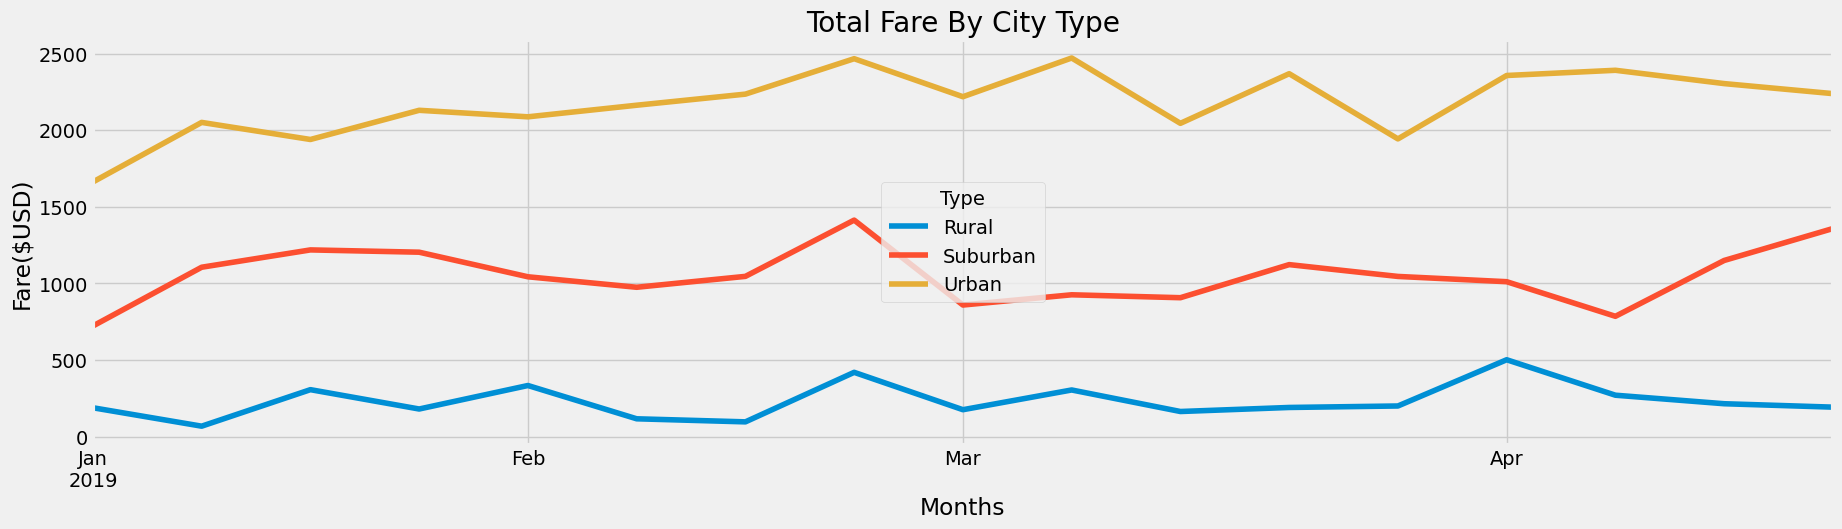

In [46]:
# 8. Using the object-oriented interface method, plot the resample DataFrame using the df.plot() function. 
pivot_sum_fare_df.plot(figsize = (20, 5))

# Import the style from Matplotlib.
from matplotlib import style

# Use the graph style fivethirtyeight.
style.use('fivethirtyeight')
plt.title("Total Fare By City Type")
plt.ylabel("Fare($USD)")
plt.xlabel("Months")
plt.legend(loc="center", title="Type")

plt.savefig("analysis/PyBer_fare_summary_png")

plt.show()
